In [1]:
#Import Mods
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt

import act
import metpy.calc as mpcalc
from metpy.units import units

from datetime import datetime
from datetime import timedelta

In [2]:
#Grab ASOS data from nearest station.
time_window = [datetime(2021, 4, 16, 0, 0), datetime(2021, 4, 24, 3, 0)]
my_asoses = act.discovery.get_asos(time_window, station = 'LOT')
station = my_asoses['LOT']

Downloading: LOT


In [3]:
#Save off data that be used later
tempsf = station.tmpf.values
dewpsf = station.dwpf.values
time = station.time.values


In [4]:
#Grab files from directory and sort them into correct order
files = []
for filename in glob.glob("/lcrc/project/waggle/public_html/private/training_data/waggle_area510/mobotix/thermal/"
                          "*.thermal.celsius.csv"):
    files.append(filename)
files.sort()

In [6]:
#Grab mask CSVs and prepare them for use
area1 = pd.read_csv("/gpfs/fs1/home/ac.jcorner/Thermal/Masks/Ground_Area1_Mask.csv")
area2 = pd.read_csv("/gpfs/fs1/home/ac.jcorner/Thermal/Masks/Ground_Area2_Mask.csv")

mask_array1 = np.array(area1)
x1, y1 = np.nonzero(mask_array1)

mask_array2 = np.array(area2)
x2, y2 = np.nonzero(mask_array2)


In [7]:
#Run through all images and save off average temperature for each
temp_avg1 = []
temp_avg2 = []
image_count = []
image_time = []


for path in files:
    file = pd.read_csv(path)
    image_time.append(datetime.fromtimestamp(int(path[86:96])) + timedelta(hours = 5))
    image_array = []
    
    
    for i in range(file.size):
        if i >= 6:
            data = file.values[i][0]
            data = data.split(';')
            array = np.array(data)
            array = array.astype(np.float)
            image_array.append(array)
            
    image_array = np.array(image_array)
    
    temp_avg1.append(np.mean(image_array[x1, y1]))
    temp_avg2.append(np.mean(image_array[x2, y2]))

In [8]:
#Convert units from Celsius to Fahrenheit
temp_avgc1 = temp_avg1 * units.celsius
temp_avgf1 = temp_avgc1.to(units.fahrenheit)

temp_avgc2 = temp_avg2 * units.celsius
temp_avgf2 = temp_avgc2.to(units.fahrenheit)

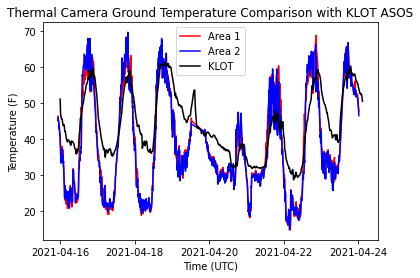

In [9]:
#Plot time series
plt.plot(image_time, temp_avgf1, color = 'Red')
plt.plot(image_time, temp_avgf2, color = 'Blue')
plt.plot(time, tempsf, color='Black')

plt.xlabel('Time (UTC)')
plt.xticks(time[np.arange(0, len(time), 144)])
plt.ylabel('Temperature (F)')

plt.title('Thermal Camera Ground Temperature Comparison with KLOT ASOS')

# Create a custom legend
plt.legend(['Area 1', 'Area 2', 'KLOT'], loc = 'upper center')


#plt.savefig('Thermal_ASOS_Comparison_Ground.png', transparent='true')